loss: 4.506961345672607


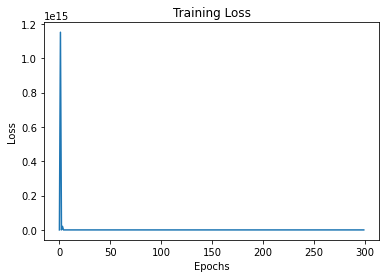

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# 데이터셋 불러오기
df = pd.read_excel("culture_data.xlsx")
label_name = "주거활동 만족도"
cols = ['전체녹지', '완충녹지', '경관녹지', '연결녹지', '1인당주상공', '1인당녹지', '전체공원',
       '도시자연공원', '소공원', '어린이공원', '근린공원', '역사공원', '문화공원', '수변공원', '묘지공원',
       '체육공원', '조례가 정하는 공원']
x = df[cols].values
y = df[label_name].values

# 데이터셋 생성하기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델 구성하기
class Net(nn.Module):
    def __init__(self, input_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = Net(len(cols))

# 모델 학습과정 설정하기
criterion = nn.MSELoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.1, alpha=0.9)

# 모델 학습시키기
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

hist = []
for epoch in range(300):
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor.unsqueeze(1))
    loss.backward()
    optimizer.step()
    hist.append(loss.item())

# 모델 평가하기
model.eval()
with torch.no_grad():
    outputs = model(x_test_tensor)
    loss = criterion(outputs, y_test_tensor.unsqueeze(1))
    print('loss:', loss.item())

# 손실 그래프 그리기
plt.plot(hist)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
